In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
import scipy.stats as st
import statistics

<h2> analysis

In [ ]:
def is_connected_estimation(G, p):
  sigma = 0
  for (node, degree) in G.degree():
    sigma += p ** degree
  return math.exp((p - 1) * sigma)

<h2>simulation

In [ ]:
def create_graphs(n, p_ER, p_WS, k, m, graphsNo, p_failure):
  ER_graphs = [None for i in range(graphsNo)]
  WS_graphs = [None for i in range(graphsNo)]
  BA_graphs = [None for i in range(graphsNo)]

  ER_analytic_results = [None for i in range(graphsNo)]
  WS_analytic_results = [None for i in range(graphsNo)]
  BA_analytic_results = [None for i in range(graphsNo)]

  for i in range(graphsNo):
    G = nx.erdos_renyi_graph(n, p_ER)
    ER_graphs[i] = G
    ER_analytic_results[i] = is_connected_estimation(G, p_failure)

  for i in range(graphsNo):
    G = nx.watts_strogatz_graph(n, k, p_WS)
    WS_graphs[i] = G
    WS_analytic_results[i] = is_connected_estimation(G, p_failure)

  for i in range(graphsNo):
    G = nx.barabasi_albert_graph(n, m)
    BA_graphs[i] = G
    BA_analytic_results[i] = is_connected_estimation(G, p_failure)

  return ER_graphs, WS_graphs, BA_graphs, np.mean(ER_analytic_results), np.mean(WS_analytic_results), np.mean(BA_analytic_results)

In [ ]:
# p: failure probability
def remove_nodes_static(G, p):
  # print("nodes",G.nodes)

  n = len(G.nodes())
  nodes = list(G.nodes())

  for node in nodes:
    r = random.random()
    if r <= p:
      G.remove_node(node)

In [ ]:
#TODO remove_edges_static

In [ ]:
def connectivity_probability(graphs):
  connecteds = 0
  for G in graphs:
    if len(G.nodes) > 0 and nx.is_connected(G):
      connecteds = connecteds + 1
  return connecteds/len(graphs)

In [ ]:
def simulation(n, p_ER, p_WS, k, m, graphNo, failure_p_values):
  ER_analytic_results = [None for i in range(len(failure_p_values))]
  WS_analytic_results = [None for i in range(len(failure_p_values))]
  BA_analytic_results = [None for i in range(len(failure_p_values))]

  ER_simulation_results = [None for i in range(len(failure_p_values))]
  WS_simulation_results = [None for i in range(len(failure_p_values))]
  BA_simulation_results = [None for i in range(len(failure_p_values))]

  for itr in range(len(failure_p_values)):
    failure_p = failure_p_values[itr]

    ### creating graphs:
    ER_graphs, WS_graphs, BA_graphs, ER_analytic_result, WS_analytic_result, BA_analytic_result = create_graphs(n, p_ER, p_WS, k, m, graphNo, failure_p)

    ### removing some nodes:
    for i in range(graphNo):
      remove_nodes_static(ER_graphs[i], failure_p)
      remove_nodes_static(WS_graphs[i], failure_p)
      remove_nodes_static(BA_graphs[i], failure_p)

    ### simulation_results:
    ER_simulation_results[itr] = connectivity_probability(ER_graphs)
    WS_simulation_results[itr] = connectivity_probability(WS_graphs)
    BA_simulation_results[itr] = connectivity_probability(BA_graphs)

    ### analytic_results:
    ER_analytic_results[itr] = ER_analytic_result
    WS_analytic_results[itr] = WS_analytic_result
    BA_analytic_results[itr] = BA_analytic_result

  return ER_analytic_results, WS_analytic_results, BA_analytic_results, ER_simulation_results, WS_simulation_results, BA_simulation_results

<h1>running the simulation

In [ ]:
graphNo = 1000
failure_p_values = [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95]

In [ ]:
n = 30
p_ER_vals = [0.2, 0.5, 0.8]
p_WS = 0.5
kWS_n_ratios = [1/20, 1/8, 1/4] # later will be some how doubled, beacuse we want k to be an even number
mBA_n_ratios = [1/10, 1/4, 1/2] 

ER_analytic_results = [None for i in range(3)]
WS_analytic_results = [None for i in range(3)]
BA_analytic_results = [None for i in range(3)]

ER_simulation_results = [None for i in range(3)]
WS_simulation_results = [None for i in range(3)]
BA_simulation_results = [None for i in range(3)]

for i in range(3):
  p_ER = p_ER_vals[i]
  k = math.ceil(kWS_n_ratios[i] * n) * 2
  m = int(mBA_n_ratios[i] * n)
  ER_analytic_results[i], WS_analytic_results[i], BA_analytic_results[i], ER_simulation_results[i], WS_simulation_results[i], BA_simulation_results[i] = simulation(n,p_ER,p_WS,k,m,graphNo,failure_p_values)

<h1> plotting the results

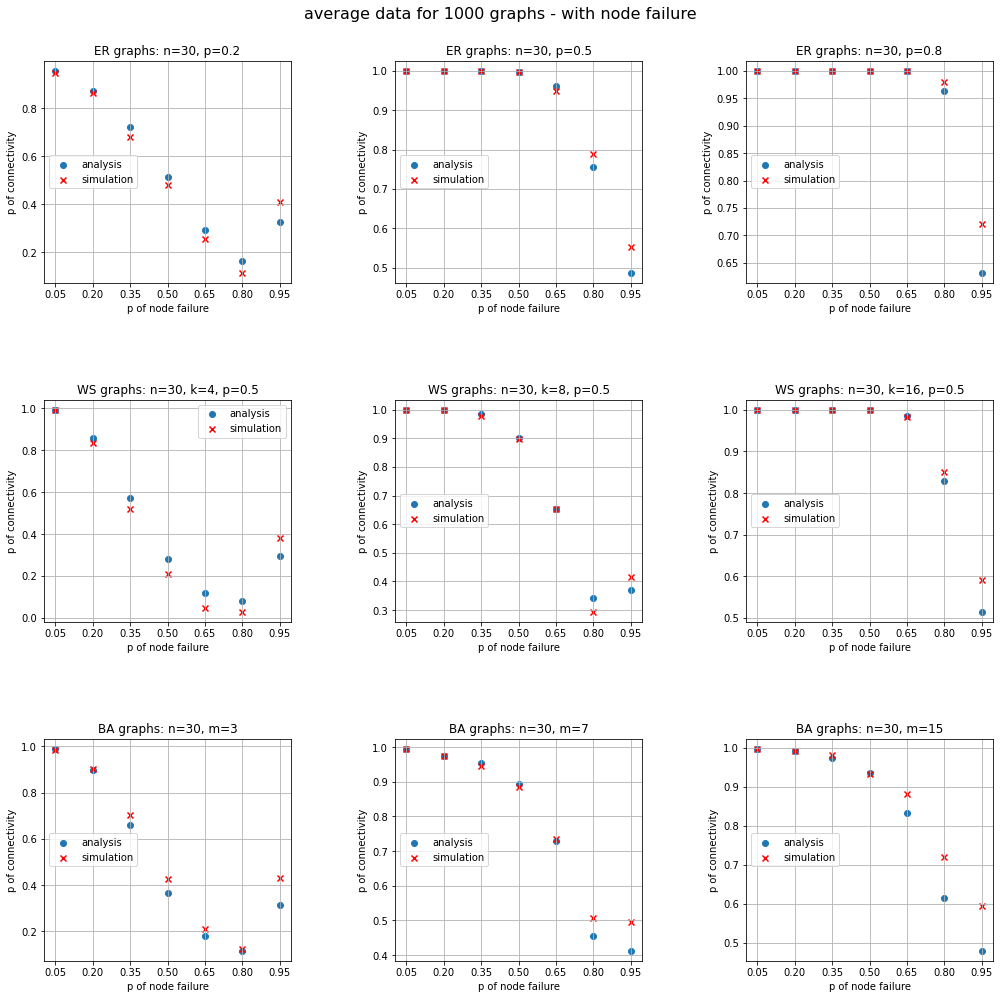

In [ ]:
fig, ax = plt.subplots(3,3)
fig.tight_layout()
fig.set_size_inches(15, 15)
fig.suptitle('average data for '+str(graphNo)+' graphs - with node failure', fontsize=16)
fig.subplots_adjust(top=0.93)

titles = [["ER graphs: n="+str(n)+", p="+str(p_ER) for p_ER in p_ER_vals] , ["WS graphs: n="+str(n)+", k="+str(math.ceil(r*n)*2)+", p="+str(p_WS) for r in kWS_n_ratios], ["BA graphs: n="+str(n)+", m="+str(int(r*n)) for r in mBA_n_ratios]]
sim_data = [ER_simulation_results, WS_simulation_results, BA_simulation_results]
ana_data = [ER_analytic_results, WS_analytic_results, BA_analytic_results]

for i in range(3):
  for j in range(3):
    ax[i,j].scatter(failure_p_values, ana_data[i][j], label = 'analysis', color='C0')
    ax[i,j].scatter(failure_p_values, sim_data[i][j], label = 'simulation', color='red', marker='x')
    ax[i,j].legend(loc='center left')
    ax[i,j].set_title(titles[i][j])
    ax[i,j].grid()
    ax[i,j].set_xticks(failure_p_values)
    ax[i,j].set_xlabel('p of node failure')
    ax[i,j].set_ylabel('p of connectivity')
    # ax[0].set_yticks(np.linspace(0, 1, num=11))  ### not beautiful

# making an exception:
plt.sca(ax[1, 0])
plt.legend(loc='upper right')

# Calculate Confidence Interval

In [ ]:
def calculate_CI(avg, Z, sigma, n):
  E = Z * sigma / math.sqrt(n)
  return E

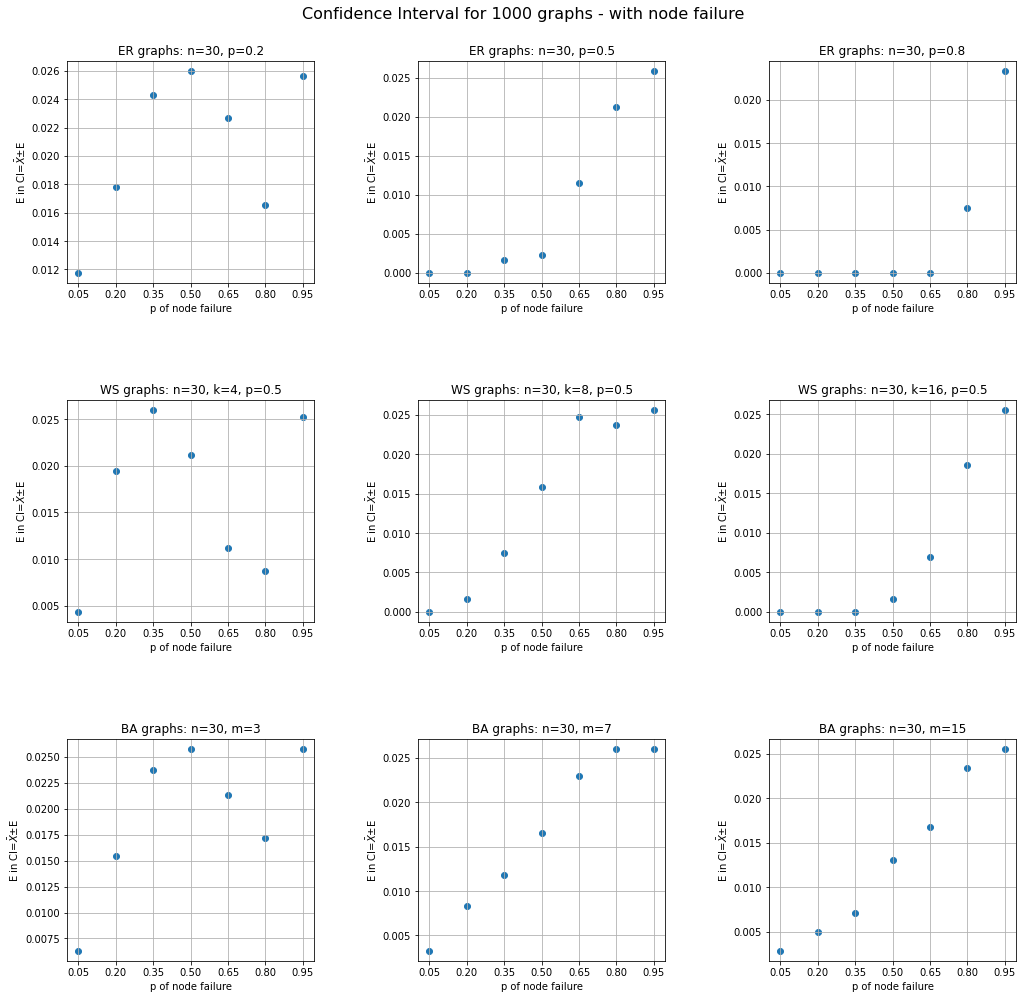

In [ ]:
probability = 0.95
fig, ax = plt.subplots(3,3)
fig.tight_layout()
fig.set_size_inches(15, 15)
fig.suptitle('Confidence Interval for '+str(graphNo)+' graphs - with node failure', fontsize=16)
fig.subplots_adjust(top=0.93)

for i in range(3):
  for j in range(3):
    CIs = []
    for k in range(len(failure_p_values)):
      CI = calculate_CI(sim_data[i][j][k], st.norm.ppf(probability), statistics.stdev([1 if x < sim_data[i][j][k] * graphNo else 0 for x in range(graphNo)]), graphNo)
      CIs.append(CI)
    # print(failure_p_values, CIs)
    ax[i,j].scatter(failure_p_values, CIs)
    ax[i,j].set_title(titles[i][j])
    ax[i,j].grid()
    ax[i,j].set_xticks(failure_p_values)
    ax[i,j].set_xlabel('p of node failure')
    ax[i,j].set_ylabel(r'E in CI=$\bar{X}$$\pm$E')

## Calculate Monte Carlo Error

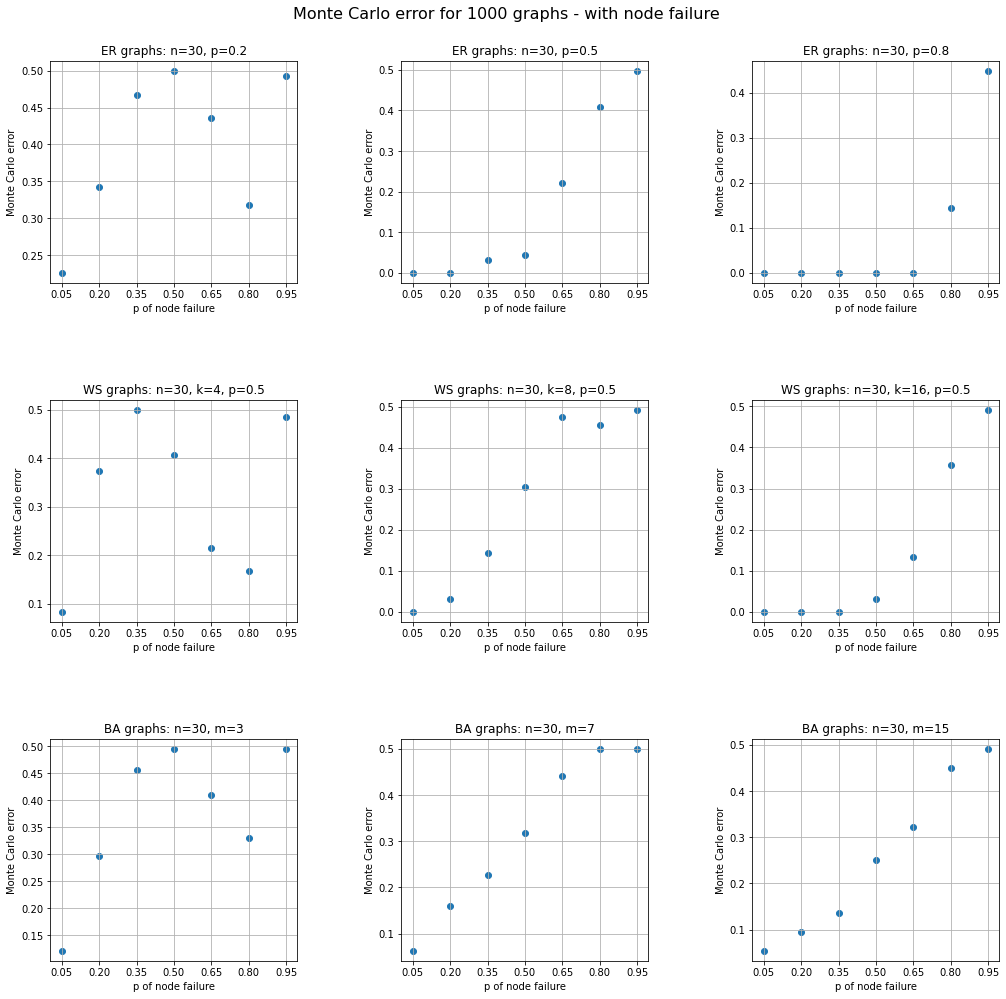

In [ ]:
fig, ax = plt.subplots(3,3)
fig.tight_layout()
fig.set_size_inches(15, 15)
fig.suptitle('Monte Carlo error for '+str(graphNo)+' graphs - with node failure', fontsize=16)
fig.subplots_adjust(top=0.93)

for i in range(3):
  for j in range(3):
    MCEs = []
    for k in range(len(failure_p_values)):
      MCE = statistics.stdev([1 if x < sim_data[i][j][k] * graphNo else 0 for x in range(graphNo)])
      MCEs.append(MCE)
    ax[i,j].scatter(failure_p_values, MCEs)
    ax[i,j].set_title(titles[i][j])
    ax[i,j].grid()
    ax[i,j].set_xticks(failure_p_values)
    ax[i,j].set_xlabel('p of node failure')
    ax[i,j].set_ylabel('Monte Carlo error')

In [ ]:
def random_list_exponential_distribution(n, my_lambda):
  random_numbers = np.random.exponential(scale=my_lambda, size=n)
  random_numbers = 1 - random_numbers / my_lambda
  return random_numbers.tolist()

def random_list_pareto_distribution(n, alpha, beta):
  #TODO
  pass

In [ ]:
random_list_exponential_distribution(10, 2)

[0.7163635999423104,
 -0.33056627271328254,
 0.7199145098202062,
 -2.7563607522836953,
 0.9299877352251466,
 0.7694562861684244,
 0.30383718842892904,
 -0.4538712985860671,
 -0.08937443910255771,
 0.5644830626172495]